<h1 style=”font-size:4rem;color:blue;text-align:center;”>Notebook 5</h1>


- Creating US-election column
- Checking for correlation between Interest rate and Currency price
- Modelling using the updated data (US Interest rate & US election year)
- Plot between actual values and predicted values

##### Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Data

In [5]:
df = pd.read_csv("data_with_IR.csv")

In [6]:
df.head(3)

,Date,Mean-value,Interest-rate,Month,Year,Quarter,Week-of-year,Week-of-month,Day-of-week,Day-of-year,election-year
0,10/11/2016,101.28,0.69,10.0,2016.0,4.0,42.0,3.0,2.0,285.0,0
1,10/13/2016,101.30,0.66,10.0,2016.0,4.0,42.0,3.0,4.0,287.0,0
2,10/13/2016,101.30,0.66,10.0,2016.0,4.0,42.0,3.0,4.0,287.0,0


In [7]:
df.tail(8)

,Date,Mean-value,Interest-rate,Month,Year,Quarter,Week-of-year,Week-of-month,Day-of-week,Day-of-year,election-year
2070,1/20/2025,128.353675,NaN,1.0,2025.0,1.0,4.0,4.0,1.0,20.0,0
2071,1/21/2025,128.174825,4.21,1.0,2025.0,1.0,4.0,4.0,2.0,21.0,0
2072,NaN,101.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2073,NaN,101.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2074,NaN,103.580000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2075,NaN,100.860000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2076,NaN,128.555000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2077,NaN,129.420000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
df["US_election"] = np.where(df["Year"].isin([2024, 2020, 2016]), 1, 0)

In [9]:
df.sample(8)

,Date,Mean-value,Interest-rate,Month,Year,Quarter,Week-of-year,Week-of-month,Day-of-week,Day-of-year,election-year,US_election
687,7/24/2019,103.76,1.98,7.0,2019.0,3.0,30.0,4.0,3.0,205.0,0,0
690,7/29/2019,103.82,1.98,7.0,2019.0,3.0,31.0,5.0,1.0,210.0,0,0
1088,2/25/2021,109.77,0.09,2.0,2021.0,1.0,9.0,4.0,4.0,56.0,0,0
609,3/15/2019,100.17,2.52,3.0,2019.0,1.0,11.0,3.0,5.0,74.0,0,0
543,12/7/2018,102.60,2.68,12.0,2018.0,4.0,49.0,2.0,5.0,341.0,0,0
1600,3/16/2023,129.76,4.49,3.0,2023.0,1.0,11.0,3.0,4.0,75.0,0,0
449,7/30/2018,100.34,2.43,7.0,2018.0,3.0,31.0,5.0,1.0,211.0,0,0
492,9/26/2018,101.06,2.58,9.0,2018.0,3.0,39.0,5.0,3.0,269.0,0,0


In [10]:
df["US_election"].value_counts()

US_election
0    1511
1     567
Name: count, dtype: int64

In [11]:
df.isna().sum()

Date              6
Mean-value        0
Interest-rate    76
Month             6
Year              6
Quarter           6
Week-of-year      6
Week-of-month     6
Day-of-week       6
Day-of-year       6
election-year     0
US_election       0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.shape

(2002, 12)

##### Load the data again to plot mean-value & Interest rate against Date

In [15]:
df2 = (pd.read_csv("data_with_IR.csv", index_col='Date', parse_dates=True)).dropna()

In [16]:
df2.shape

(2002, 10)

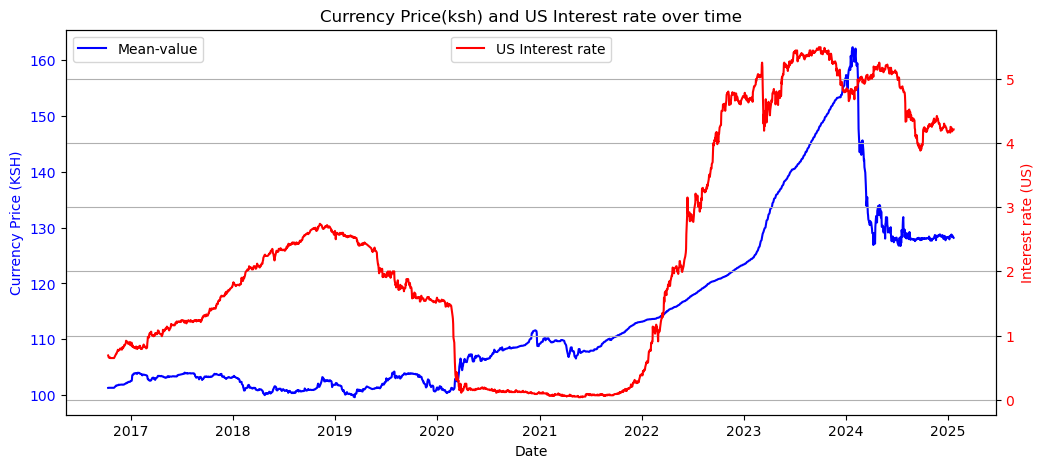

In [17]:
#Plotting

fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(df2.index, df2['Mean-value'], label='Mean-value', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Currency Price (KSH)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  # Create a twin axis sharing the same x-axis
ax2.plot(df2.index, df2['Interest-rate'], label='US Interest rate', color='red')
ax2.set_ylabel('Interest rate (US)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Currency Price(ksh) and US Interest rate over time')
plt.grid()

ax1.legend(loc='upper left')
ax2.legend(loc='upper center')

plt.show()

There is a notable correlation between the Currency price and Interest rate

#### Train Test Split

##### Random train test split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop(columns = ["Date", "Mean-value", "Year"], axis=1)
y = df["Mean-value"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1501, 9), (501, 9), (1501,), (501,))

In [25]:
X_train.head(2)

,Interest-rate,Month,Quarter,Week-of-year,Week-of-month,Day-of-week,Day-of-year,election-year,US_election
567,2.57,1.0,1.0,3.0,3.0,3.0,16.0,0,0
967,0.13,9.0,3.0,36.0,1.0,5.0,248.0,0,1


#### Modelling

In [27]:
#models
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor

In [28]:
models = {
    "Ridge" : Ridge(alpha=1.0),
    "Lasso" : Lasso(alpha=1.0),
    "Random Forest" : RandomForestRegressor(),
    "KNeighbors" : KNeighborsRegressor(),
    "SVM" : SVR(kernel = 'rbf', C=1.0, epsilon=0.1),
    "XGBoost" : XGBRegressor(),
    "ElasticNet" : ElasticNet(alpha=0.1, l1_ratio=0.7),
    "Gradient Boost Regressor" : GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3),
    "AdaBoost" : AdaBoostRegressor(n_estimators=100, learning_rate=0.1),
    "lightgbm" : LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5),
    "Neural Networks" : MLPRegressor(hidden_layer_sizes=(1000), max_iter=500)
        
}

##### Random train test split modelling

In [30]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name}: {model.score(X_test, y_test)}")

Ridge: 0.627365408812846
Lasso: 0.5636812238187825
Random Forest: 0.9835443589003826
KNeighbors: 0.6978837272120704
SVM: -0.1016789859450078
XGBoost: 0.9799081981102695
ElasticNet: 0.6068577947351326


C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.329e+04, tolerance: 3.389e+01
  model = cd_fast.enet_coordinate_descent(


Gradient Boost Regressor: 0.9588195543780186
AdaBoost: 0.9057619278633205
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 1501, number of used features: 9
[LightGBM] [Info] Start training from score 114.324549
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

#### 1.1 Random Forest

In [32]:
rf = RandomForestRegressor()

In [33]:
rf_model = rf.fit(X_train, y_train)

In [34]:
preds = rf_model.predict(X_test)

In [35]:
rf_model.score(X_test, y_test)

0.9843056322368139

#### Save the model

In [37]:
import joblib
import os
# Save the best model to a file
joblib.dump(rf_model, "rf_model1.pkl")

['rf_model1.pkl']

In [38]:
y_test

1441    118.66
365     100.86
1378    115.54
936     107.88
1333    113.64
         ...  
1401    116.69
421     100.96
1669    140.44
718     103.82
1704    143.91
Name: Mean-value, Length: 501, dtype: float64

In [39]:
actual = pd.DataFrame(y_test)

In [40]:
actual['preds'] = preds

In [41]:
actual

,Mean-value,preds
1441,118.66,118.6946
365,100.86,101.1062
1378,115.54,115.5713
936,107.88,107.5938
1333,113.64,113.6363
...,...,...
1401,116.69,116.5528
421,100.96,101.0518
1669,140.44,140.4850
718,103.82,103.8041


In [42]:
actuals = actual.reset_index()

In [43]:
actuals

,index,Mean-value,preds
0,1441,118.66,118.6946
1,365,100.86,101.1062
2,1378,115.54,115.5713
3,936,107.88,107.5938
4,1333,113.64,113.6363
...,...,...,...
496,1401,116.69,116.5528
497,421,100.96,101.0518
498,1669,140.44,140.4850
499,718,103.82,103.8041


<Axes: >

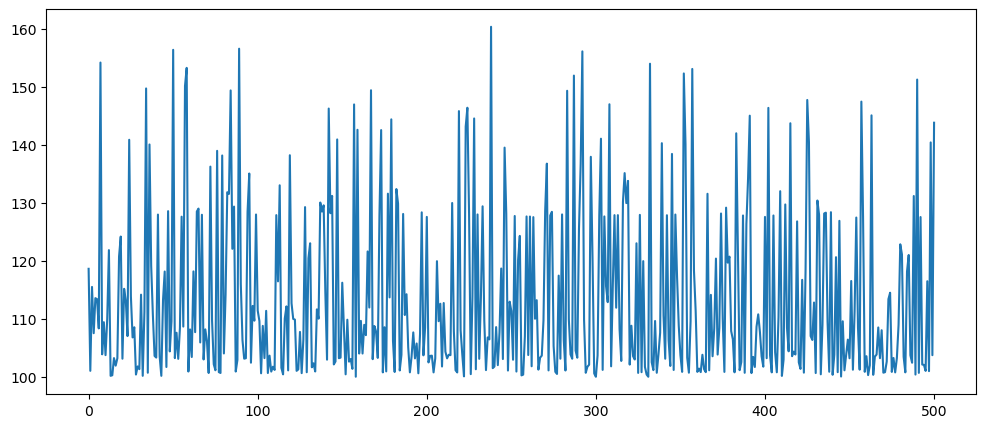

In [44]:
actuals['preds'].plot(figsize=(12,5))

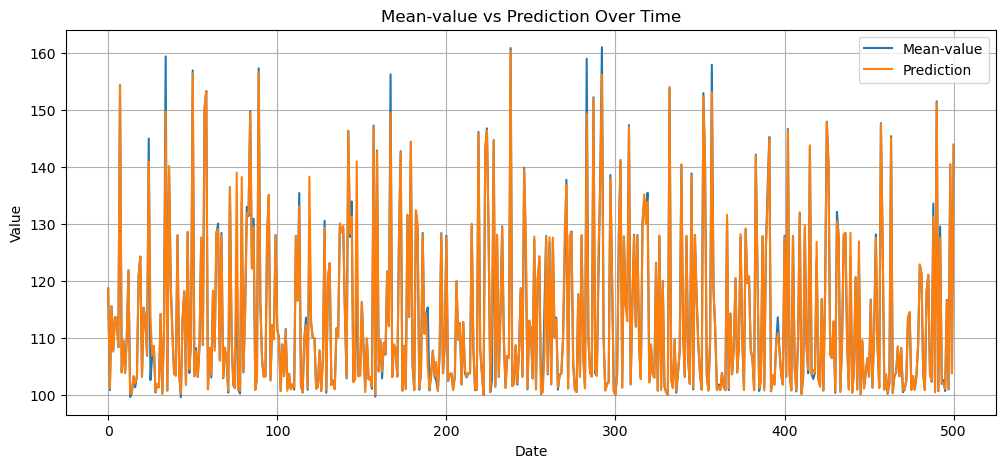

In [45]:
plt.figure(figsize=(12, 5))
plt.plot(actuals.index, actuals['Mean-value'], label='Mean-value')
plt.plot(actuals.index, actuals['preds'], label='Prediction')

# Add labels, title, and legend

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Mean-value vs Prediction Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

#### merging the data

In [47]:
df_merged2 = pd.merge(df, actual, left_index=True, right_index=True)

In [48]:
df_merged2

,Date,Mean-value_x,Interest-rate,Month,Year,Quarter,Week-of-year,Week-of-month,Day-of-week,Day-of-year,election-year,US_election,Mean-value_y,preds
2,10/13/2016,101.30000,0.66,10.0,2016.0,4.0,42.0,3.0,4.0,287.0,0,1,101.30000,101.299600
24,11/23/2016,101.85000,0.80,11.0,2016.0,4.0,48.0,4.0,3.0,328.0,0,1,101.85000,101.851900
32,12/1/2016,101.85000,0.82,12.0,2016.0,4.0,49.0,1.0,4.0,336.0,0,1,101.85000,101.862600
33,12/2/2016,101.86000,0.80,12.0,2016.0,4.0,49.0,1.0,5.0,337.0,0,1,101.86000,101.882800
35,12/6/2016,101.87000,0.83,12.0,2016.0,4.0,50.0,2.0,2.0,341.0,0,1,101.87000,101.891900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,12/16/2024,127.96115,4.24,12.0,2024.0,4.0,51.0,3.0,1.0,351.0,0,1,127.96115,128.222645
2051,12/23/2024,127.73115,4.26,12.0,2024.0,4.0,52.0,4.0,1.0,358.0,0,1,127.73115,128.281008
2058,1/2/2025,128.22750,4.17,1.0,2025.0,1.0,1.0,1.0,4.0,2.0,0,0,128.22750,128.578814
2061,1/7/2025,128.41735,4.19,1.0,2025.0,1.0,2.0,2.0,2.0,7.0,0,0,128.41735,128.150278


In [49]:
df_merged2_index = df_merged2.set_index('Date')

In [50]:
df_merged2

,Date,Mean-value_x,Interest-rate,Month,Year,Quarter,Week-of-year,Week-of-month,Day-of-week,Day-of-year,election-year,US_election,Mean-value_y,preds
2,10/13/2016,101.30000,0.66,10.0,2016.0,4.0,42.0,3.0,4.0,287.0,0,1,101.30000,101.299600
24,11/23/2016,101.85000,0.80,11.0,2016.0,4.0,48.0,4.0,3.0,328.0,0,1,101.85000,101.851900
32,12/1/2016,101.85000,0.82,12.0,2016.0,4.0,49.0,1.0,4.0,336.0,0,1,101.85000,101.862600
33,12/2/2016,101.86000,0.80,12.0,2016.0,4.0,49.0,1.0,5.0,337.0,0,1,101.86000,101.882800
35,12/6/2016,101.87000,0.83,12.0,2016.0,4.0,50.0,2.0,2.0,341.0,0,1,101.87000,101.891900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,12/16/2024,127.96115,4.24,12.0,2024.0,4.0,51.0,3.0,1.0,351.0,0,1,127.96115,128.222645
2051,12/23/2024,127.73115,4.26,12.0,2024.0,4.0,52.0,4.0,1.0,358.0,0,1,127.73115,128.281008
2058,1/2/2025,128.22750,4.17,1.0,2025.0,1.0,1.0,1.0,4.0,2.0,0,0,128.22750,128.578814
2061,1/7/2025,128.41735,4.19,1.0,2025.0,1.0,2.0,2.0,2.0,7.0,0,0,128.41735,128.150278


#### Plotting the Prediction values and the Actual values

### import matplotlib.dates as mdates

#Plot
plt.figure(figsize=(12, 5))
plt.plot(df_merged2_index.index, df_merged2_index['Mean-value_x'], label='Actual Values')
plt.plot(df_merged2_index.index, df_merged2_index['preds'], label='Predicted Values')

#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actuals & Predicted values over Time')
plt.legend()
plt.grid(True)

plt.show()

In [53]:
df_merged2.to_csv("df_merged2.csv", index=False)

#### 2.1 LightGBM

In [55]:
lgbm = LGBMRegressor(n_estimators=100, learning_rate=1, max_depth=3)

In [56]:
lgbm_model = lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 1501, number of used features: 9
[LightGBM] [Info] Start training from score 114.324549
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [57]:
lgbm_model.score(X_test, y_test)

0.9789836532387528

#### GridSearch CV

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [60]:
rf = RandomForestRegressor()

In [61]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [62]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [63]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best hyperparameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 4.868378839871016


In [64]:
grid_search.score(X_test, y_test)

-3.5554186877666667